In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets ## imports datasets from scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Datasets

In [2]:
data = datasets.load_boston() ## loads Boston dataset from datasets library 

df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=["MEDV"])
# Concatenate y in the dataframe
df_target = pd.concat([df,target], axis=1)

# Some Exploration

## 1. When variables are centered, the intercept term is always 0

In [5]:
# This is to show that when all variables are centered, the intercept beta_0 is always 0.
df_centered = df_target - df_target.mean(axis=0)
model = smf.ols(formula='MEDV ~ CHAS + RM + AGE', data=df_centered).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     203.8
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           1.93e-86
Time:                        11:52:47   Log-Likelihood:                -1638.7
No. Observations:                 506   AIC:                             3285.
Df Residuals:                     502   BIC:                             3302.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.617e-14      0.275   1.31e-13      1.000      -0.541       0.541
CHAS           5.0278      1.097      4.585      0.000       2.873       7.182
RM             8.1855      0.407     20.119      0.000       7.386       8.985
AGE           -0.0780      0.010     -7.684      0.000      -0.098      -0.058
==============================================================================
Omnibus:                      179.098   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1274.618
Skew:                           1.355   Prob(JB):                    1.66e-277
Kurtosis:                      10.287   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2. Standardization

In [6]:
from sklearn.preprocessing import StandardScaler
data = pd.DataFrame([[0, 0], [0, 0], [1, 1], [1, 1]],dtype=np.float64)
scaler = StandardScaler() # call the scaler function
scaler.fit(data) # use the scaler to fit the data
print('mean of data', scaler.mean_, 'variance of data', scaler.var_)

data_scaled = scaler.transform(data) # use transform to obtain the scaled data
print('scaled data is\n', data_scaled)

print(scaler.transform([[2, 2]]))   # Now we can transform any data points

mean of data [0.5 0.5] variance of data [0.25 0.25]
scaled data is
 [[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
[[3. 3.]]


# Lasso and Ridge

## 1. Without Cross-validation

### 1.1 Lasso (use sklearn package) 

The objective for Lasso is: 
(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

In [41]:
# First step, transformation
from sklearn.preprocessing import StandardScaler
y = target
df_dummy = pd.get_dummies(df, columns = ['CHAS'],drop_first = True) # Change categorical to one-hot
X = df_dummy.drop(columns=['ZN','INDUS','NOX','RAD','AGE','PTRATIO','B']) # we don't include these variables in the model
scaler_x, scaler_y = StandardScaler(), StandardScaler()
scaler_x.fit(X)
scaler_y.fit(y)
X = scaler_x.transform(X)
y = scaler_y.transform(y)

/Users/chenghua/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/chenghua/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [9]:
# Lasso
from sklearn.linear_model import Lasso      # Runs Lasso with a given parameter
model = Lasso(alpha=0.15)                    # Here alpha is like lambda in our slide
model.fit(X, y)

Lasso(alpha=0.15, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [10]:
print(model.coef_)         # beta_1, beta_2,...,beta_6
print(model.intercept_)    # beta_0 (we see that with the transformation, beta_0 = 0)
print(model.score(X,y))    # R^2
y_pred = model.predict(X)  # Predicting y given X
print(y_pred[:5])

[-0.          0.29736325 -0.         -0.01606816 -0.39639773  0.        ]
[-6.09665115e-16]
0.6131825436772258
[0.56007244 0.2688365  0.87643327 0.85968643 0.79000964]


### 1.2 Ridge (sklearn)

The objective for ridge is: 
||y - Xw||^2_2 + alpha * ||w||^2_2

In [13]:
# Ridge
from sklearn.linear_model import Ridge      # Runs Ridge with a given parameter
model = Ridge(alpha=0.15*(2*len(y)))                   # Here alpha is like lambda in our slide
model.fit(X, y)

Ridge(alpha=151.79999999999998, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [14]:
print(model.coef_)         # beta_1, beta_2,...,beta_6
print(model.intercept_)    # beta_0
print(model.score(X,y))    # R^2
y_pred = model.predict(X)
y_pred = model.predict(X)  # Predicting y given X
print(y_pred[:5])

[[-0.07711512  0.33139771 -0.0628562  -0.12809425 -0.35081919  0.08538305]]
[-6.02842017e-16]
0.6583909160735733
[[0.60008944]
 [0.33749744]
 [0.94949148]
 [0.89725359]
 [0.84974177]]


### 1.3 Lasso and Ridge using statsmodels package

#### Full model

In [17]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.678
Model:                            OLS   Adj. R-squared (uncentered):              0.674
Method:                 Least Squares   F-statistic:                              175.1
Date:                Tue, 30 Mar 2021   Prob (F-statistic):                   1.87e-119
Time:                        11:57:21   Log-Likelihood:                         -431.62
No. Observations:                 506   AIC:                                      875.2
Df Residuals:                     500   BIC:                                      900.6
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0583      0.032     -1.819      0.069      -0.121       0.005
x2             0.3715      0.033     11.387      0.000       0.307       0.436
x3            -0.1536      0.032     -4.789      0.000      -0.217      -0.091
x4            -0.1467      0.036     -4.111      0.000      -0.217      -0.077
x5            -0.4746      0.039    -12.061      0.000      -0.552      -0.397
x6             0.0920      0.026      3.564      0.000       0.041       0.143
==============================================================================
Omnibus:                      165.592   Durbin-Watson:                   0.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              648.809
Skew:                           1.446   Prob(JB):                    1.30e-141
Kurtosis:                       7.734   Cond. No.                         3.10
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### lasso

The objective for this package is:
    0.5∗𝑅𝑆𝑆/𝑛+𝑎𝑙𝑝ℎ𝑎∗((1−𝐿1_𝑤𝑡)∗|𝑝𝑎𝑟𝑎𝑚𝑠|22/2+𝐿1_𝑤𝑡∗|𝑝𝑎𝑟𝑎𝑚𝑠|1)

In [18]:
model = sm.OLS(y, X).fit_regularized(alpha=0.15, L1_wt=1.0) # Lasso
print(model.params)

[ 0.          0.29734871  0.         -0.01604702 -0.39641816  0.        ]


#### Ridge

In [19]:
model = sm.OLS(y, X).fit_regularized(alpha=0.15*(2), L1_wt=0)  # Ridge (Need to pay attention to the objective)
print(model.params)

[-0.07711512  0.33139771 -0.0628562  -0.12809425 -0.35081919  0.08538305]


## 2. Lasso and Ridge with Cross-Validation

### 2.1 Split data in Kfold

In [26]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [27]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281
 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299
 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317
 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335
 336 337 338 339 340 341 342 343 344 345 346

In [28]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=True)


In [29]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [  0   1   2   4   5   7   8  10  12  15  16  17  19  20  22  24  26  27
  28  29  30  31  33  36  37  39  40  42  43  44  46  48  51  52  53  54
  55  56  57  59  60  61  62  66  67  68  69  71  72  73  74  75  76  77
  78  79  80  81  82  83  85  86  87  88  90  91  92  93  94  95  97  98
  99 100 102 103 104 105 106 107 108 109 110 112 113 114 116 117 118 119
 120 121 122 124 125 126 127 128 129 131 132 133 135 136 137 138 139 141
 143 145 146 147 148 149 150 151 152 153 154 155 157 158 159 162 164 165
 166 167 168 169 170 171 173 174 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 192 194 195 196 198 199 200 201 202 203 204 206 207
 208 209 210 211 212 213 214 216 217 218 219 220 221 222 224 225 226 227
 228 229 231 232 233 234 235 237 238 239 240 241 243 244 245 248 249 250
 251 252 253 254 255 256 257 258 259 260 262 263 264 265 266 268 269 270
 271 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 291 292 293 294 295 296 297 298 299 300 301

### 2.2 We can use the builtin Package cross_val_score to evaluate the model

In [110]:
from sklearn.model_selection import cross_val_score
model = Lasso(alpha=0.15)                    # Here alpha is like lambda in our slide
print(cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error'))
# Output the cross validation score for each fold

[-0.11519645 -0.36833356 -0.82039383 -0.84205337 -0.43112767]


In [111]:
from sklearn.model_selection import cross_val_score
model = Ridge(alpha=0.15*(2*len(y)))                    # Here alpha is like lambda in our slide
print(cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error'))
# Output the cross validation score for each fold

[-0.12284232 -0.31074328 -0.47458661 -0.79483972 -0.2517076 ]


### 2.3 Grid Search and CV search for the best lambda

In [101]:
# First step, transformation
from sklearn.preprocessing import StandardScaler
y = target
df_dummy = pd.get_dummies(df, columns = ['CHAS'],drop_first = True) # Change categorical to one-hot
X = df_dummy
scaler_x, scaler_y = StandardScaler(), StandardScaler()
scaler_x.fit(X)
scaler_y.fit(y)
X = scaler_x.transform(X)
y = scaler_y.transform(y)

/Users/chenghua/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/chenghua/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


/Users/chenghua/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


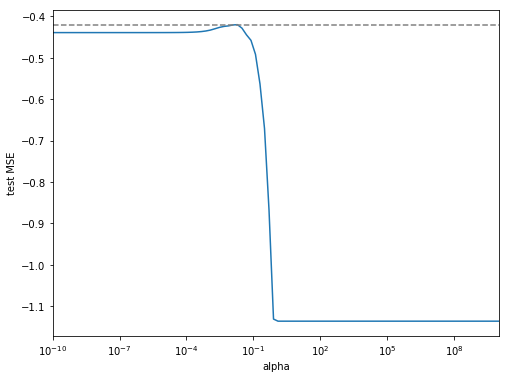

{'alpha': 0.019179102616724848}


In [107]:
from sklearn.model_selection import GridSearchCV
model = Lasso()
alphas = np.logspace(-10, 10, 100)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(model, tuned_parameters, cv=n_folds, refit=False, scoring='neg_mean_squared_error')
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
plt.ylabel('test MSE')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()
print(clf.best_params_)

/Users/chenghua/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


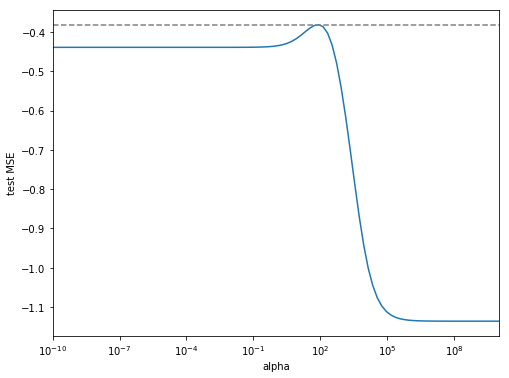

{'alpha': 83.02175681319736}


In [108]:
from sklearn.model_selection import GridSearchCV
model = Ridge()
alphas = np.logspace(-10, 10, 100)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(model, tuned_parameters, cv=n_folds, refit=False, scoring='neg_mean_squared_error')
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
plt.ylabel('test MSE')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

print(clf.best_params_)